<a href="https://colab.research.google.com/github/ParthUpah/RISEN_CS367_LAB_CODES/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

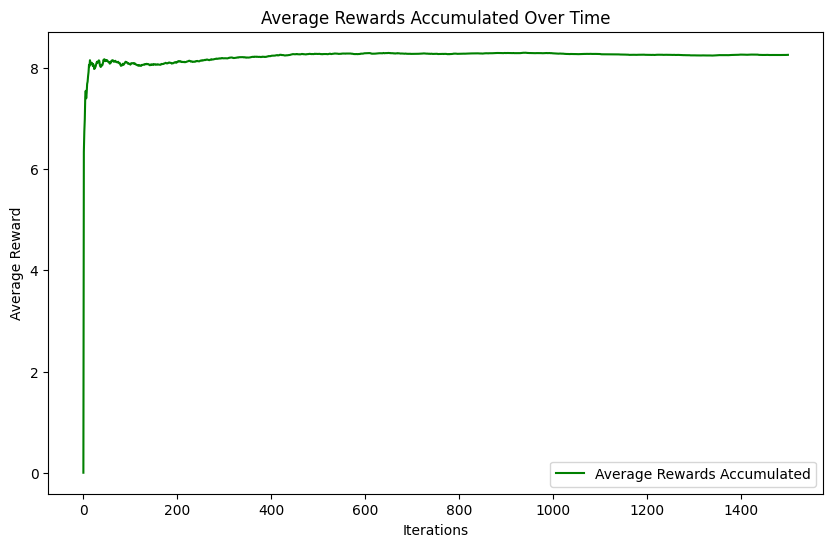

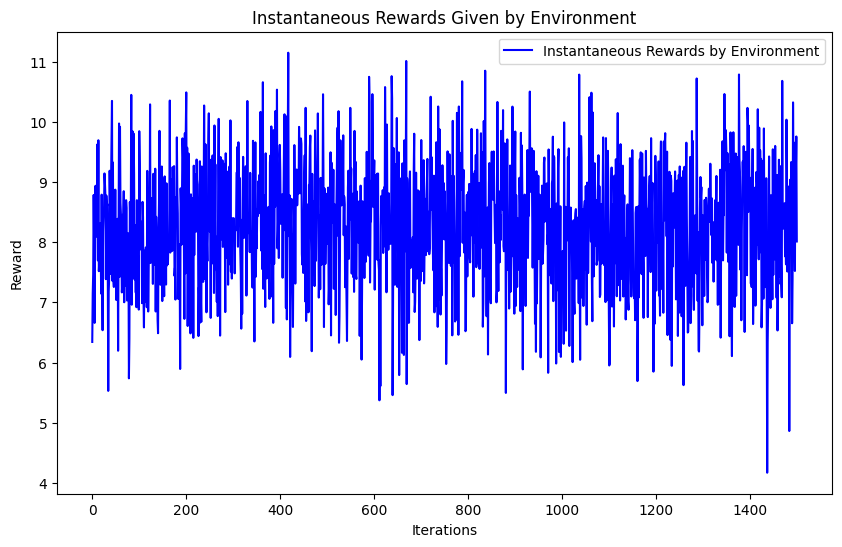

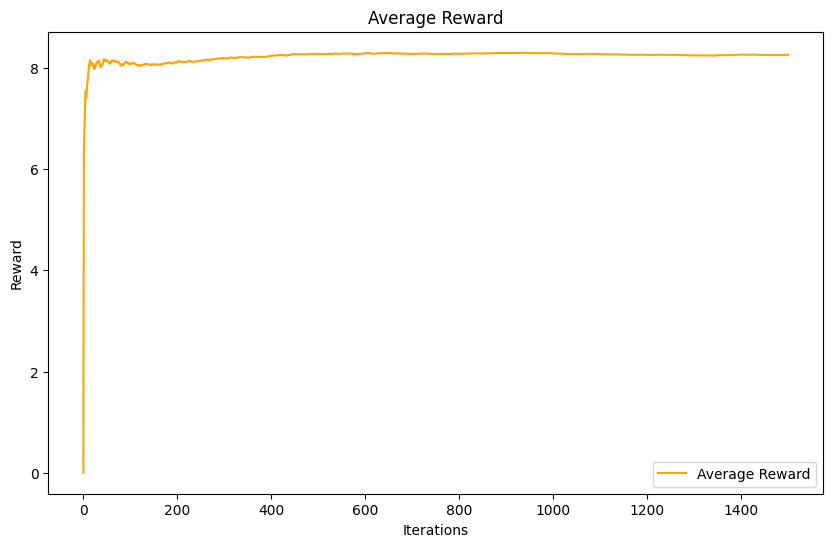

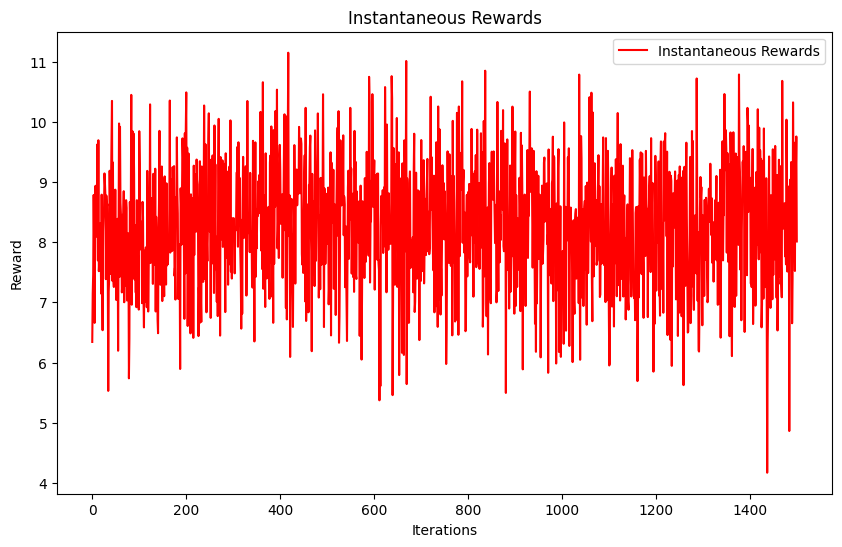

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np


class MultiArmBandit:
    def __init__(self, arms, base_reward=5.0, reward_variance=0.5):
        self.num_arms = arms
        self.expected_rewards = np.array([base_reward] * self.num_arms, dtype=float)
        self.reward_variance = reward_variance

    def get_available_actions(self):
        return list(range(self.num_arms))

    def update_rewards(self, mean_increment=0.01):
        increment = np.random.normal(0, mean_increment, self.num_arms)
        self.expected_rewards += increment

    def get_reward(self, action):
        noise = np.random.normal(0, self.reward_variance)
        return self.expected_rewards[action] + noise


def epsilon_greedy(bandit, exploration_prob, iterations, dynamic_epsilon=False):
    estimates = [0.0] * bandit.num_arms
    action_counts = [0] * bandit.num_arms
    instantaneous_rewards = []
    average_rewards = [0.0]

    for t in range(1, iterations + 1):
        if dynamic_epsilon:
            epsilon = exploration_prob / np.sqrt(t)  # Dynamically scale epsilon
        else:
            epsilon = exploration_prob

        # Choose action
        if random.random() < epsilon:
            action = random.choice(bandit.get_available_actions())  # Explore
        else:
            action = estimates.index(max(estimates))  # Exploit

        # Get reward
        reward = bandit.get_reward(action)
        bandit.update_rewards()

        # Update estimates
        action_counts[action] += 1
        estimates[action] += (reward - estimates[action]) / action_counts[action]

        # Track rewards
        instantaneous_rewards.append(reward)
        average_rewards.append(average_rewards[-1] + (reward - average_rewards[-1]) / t)

    return estimates, average_rewards, instantaneous_rewards


# Testing the epsilon_greedy strategy
bandit = MultiArmBandit(arms=3, base_reward=8.0, reward_variance=1.0)
estimates, avg_rewards, inst_rewards = epsilon_greedy(bandit, exploration_prob=0.2, iterations=1500)

# Plot 1: Average Rewards Accumulated Over Time
plt.figure(figsize=(10, 6))
plt.plot(avg_rewards, label="Average Rewards Accumulated", color='green')
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Rewards Accumulated Over Time")
plt.legend()
plt.show()

# Plot 2: Instantaneous Rewards Given by Environment
plt.figure(figsize=(10, 6))
plt.plot(inst_rewards, label="Instantaneous Rewards by Environment", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Instantaneous Rewards Given by Environment")
plt.legend()
plt.show()

# Plot 3: Average Reward (Zoomed in on Accumulated Rewards)
plt.figure(figsize=(10, 6))
plt.plot(avg_rewards, label="Average Reward", color='orange')
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Average Reward")
plt.legend()
plt.show()

# Plot 4: Instantaneous Rewards
plt.figure(figsize=(10, 6))
plt.plot(inst_rewards, label="Instantaneous Rewards", color='red')
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Instantaneous Rewards")
plt.legend()
plt.show()